In [280]:
import pandas as pd
from plotnine import *
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt




# TODO:
REMOVER ISSO
https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# IA376M - Exercício Individual

# Dataset

O *dataset* utilizado neste trabalho foi o **"Titanic: Machine Learning from Disaster"**, retirado do *Kaggle*, conforme este [link](https://www.kaggle.com/competitions/titanic/data). Este *dataset* contém informações sobre tripulantes do *Titanic*, como classe social,indicando quais deles sobreviveram ao naufrágio.

# Perguntas

Este trabalho tem como objetivo responder as seguintes perguntas através da análise exploratória de dados (EDA):
- Quais fatores influenciaram mais a sobrevivência no naufrágio?
    - Qual a relação entre classe social e sobrevivência?
    - O efeito da idade ou gênero na probabilidade de sobrevivência?


# Etapas:
1. Carregamento de dados
1. Base teórica
1. Visualização de variáveis categóricas
1. Visualização de variáveis contínuas
1. Conclusão

## 1. Carregamento de dados

In [281]:
path_dataset = "./titanic/train.csv"
df_titanic = pd.read_csv(path_dataset)


# Mostre as primeiras linhas do dataset
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Conforme tabela acima, temos um total de 12 colunas. A tabela abaixo descreve detalhadamente o que é cada campo.

| Coluna       | Descrição                                                                 | Tipo de Dado  |
|--------------|---------------------------------------------------------------------------|---------------|
| `PassengerId`| Identificador único para cada passageiro.                                 | `int64`       |
| `Survived`   | Indica se o passageiro sobreviveu (1) ou não (0).                         | `int64`       |
| `Pclass`     | Classe do ticket do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe). | `int64`       |
| `Name`       | Nome completo do passageiro.                                              | `object`      |
| `Sex`        | Sexo do passageiro (male ou female).                                      | `object`      |
| `Age`        | Idade do passageiro em anos (pode conter valores nulos).                  | `float64`     |
| `SibSp`      | Número de irmãos/cônjuges a bordo.                                        | `int64`       |
| `Parch`      | Número de pais/filhos a bordo.                                            | `int64`       |
| `Ticket`     | Número do bilhete do passageiro.                                          | `object`      |
| `Fare`       | Valor pago pela passagem.                                                 | `float64`     |
| `Cabin`      | Número da cabine do passageiro (pode conter valores nulos).               | `object`      |
| `Embarked`   | Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).       | `object`      |


## 2. Base Teórica


### Teste Qui-Quadrado (Chi²)

O **teste qui-quadrado** é uma técnica estatística usada para verificar se existe uma associação significativa entre duas variáveis categóricas. Ele compara as frequências observadas em uma tabela de contingência com as frequências esperadas sob a hipótese de que não há associação entre as variáveis (hipótese nula).

#### Quando Usar
Este teste é adequado quando você tem **duas variáveis categóricas** e deseja saber se uma variável influencia a outra. Por exemplo, ao analisar a relação entre o gênero (masculino/feminino) e a sobrevivência no Titanic (sobreviveu/não sobreviveu), ambas sendo variáveis categóricas.

#### Como Funciona
1. **Hipótese nula (H₀)**: Assume-se que não há associação entre as variáveis.
2. **Hipótese alternativa (H₁)**: Assume-se que há uma associação significativa.

#### Como é Calculado
O teste compara as **frequências observadas** com as **frequências esperadas**, que seriam as contagens esperadas se não houvesse relação entre as variáveis. A fórmula do qui-quadrado é:


$$\chi² = \sum \frac{(O_i - E_i)^2}{E_i}$$


Onde:
- $O_i$ são as frequências observadas,
- $E_i$ são as frequências esperadas.

O resultado é comparado a uma distribuição qui-quadrado com graus de liberdade baseados no número de categorias. Se o valor calculado for maior que o valor crítico da distribuição, rejeitamos a hipótese nula, indicando que há uma associação significativa entre as variáveis.

#### Exemplo de Aplicação
Suponha que você queira testar se há uma relação entre o gênero e a sobrevivência no Titanic. Você criaria uma tabela de contingência com as frequências observadas de sobreviventes e não sobreviventes por gênero, calcularia as frequências esperadas e aplicaria o teste qui-quadrado para verificar se há uma associação significativa entre essas duas variáveis.


### Teste t de Student (t-test)

O **teste t de Student** é utilizado para comparar as médias de dois grupos e verificar se existe uma diferença significativa entre elas. Ele é apropriado quando a variável de interesse é **contínua** e você quer avaliar se as médias de dois grupos (ou amostras) são estatisticamente diferentes.

#### Quando Usar
Use o teste t quando:
- Você tem **duas amostras** e deseja comparar suas médias.
- A variável que você está analisando é contínua (ex: idade, altura, peso).
- Você quer testar a diferença entre dois grupos independentes ou amostras pareadas.

#### Tipos de Teste t
- **Teste t para amostras independentes**: Compara a média de duas amostras independentes, como homens e mulheres.
- **Teste t pareado**: Compara duas médias em situações relacionadas, como o desempenho de uma pessoa antes e depois de um tratamento.
- **Teste t de uma amostra**: Compara a média de uma amostra com um valor de referência conhecido.

#### Como Funciona
1. **Hipótese nula (H₀)**: Não há diferença significativa entre as médias dos dois grupos.
2. **Hipótese alternativa (H₁)**: Existe uma diferença significativa entre as médias dos dois grupos.

#### Como é Calculado
O teste t calcula a estatística t usando a seguinte fórmula para amostras independentes:


$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$$


Onde:
- $\bar{X}_1$ e $\bar{X}_2$ são as médias das duas amostras,
- $S_1^2$ e $S_2^2$ são as variâncias das duas amostras,
- $n_1$ e $n_2$ são os tamanhos das duas amostras.

Esse valor t é comparado com um valor crítico da **distribuição t de Student** com graus de liberdade baseados no tamanho das amostras. Se o valor t calculado for maior que o valor crítico, rejeitamos a hipótese nula.

#### Exemplo de Aplicação
Suponha que você queira testar se a idade média dos passageiros que sobreviveram no Titanic é diferente da idade média dos que não sobreviveram. Você pode usar o teste t para comparar essas duas médias e verificar se a diferença é estatisticamente significativa.


### O que são p-values?

O **p-valor** (ou p-value) é uma medida que ajuda a determinar a significância estatística de um teste de hipótese. Ele representa a probabilidade de observarmos os resultados obtidos (ou algo ainda mais extremo) assumindo que a hipótese nula (**H₀**) seja verdadeira.

#### Interpretação
- Um **p-valor baixo** indica que os dados observados são improváveis sob a hipótese nula. Portanto, se o p-valor for suficientemente baixo, podemos **rejeitar a hipótese nula**.
- Um **p-valor alto** sugere que os dados observados são consistentes com a hipótese nula, ou seja, **não há evidência suficiente para rejeitar H₀**.

### Valores de Interesse

Na prática, os valores de p-value são comparados com um nível de significância (**α**, alpha), que é o limiar que define se rejeitamos ou não a hipótese nula. Comumente, são utilizados os seguintes níveis de significância:

- **α = 0,05 (5%)**: Este é o valor de corte mais comum. Se o p-valor for menor que 0,05, rejeitamos a hipótese nula com 95% de confiança.
- **α = 0,01 (1%)**: Nível de significância mais rigoroso. Um p-valor abaixo de 0,01 indica forte evidência contra a hipótese nula.
- **α = 0,10 (10%)**: Um limiar menos rigoroso. Utilizado em situações onde se aceita uma maior chance de erro tipo I (falso positivo).

### Como Usar os p-values na Validação de Hipóteses

1. **Estabelecer a hipótese nula (H₀)**: Assume que não há efeito ou diferença significativa.
2. **Calcular o p-valor** com base nos dados observados.
3. **Comparar o p-valor com o nível de significância (α)**:
   - Se o **p-valor ≤ α**, rejeitamos a hipótese nula (há uma diferença significativa).
   - Se o **p-valor > α**, não rejeitamos a hipótese nula (não há evidência suficiente para sugerir uma diferença significativa).


## 3. Análise Exploratória

In [282]:
# Conta o número de linhas e colunas
shape = df_titanic.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas")

O dataset possui 891 linhas e 12 colunas


### Tratamento de dados faltantes

In [283]:
# Conta o número de dados faltantes por coluna
missing = df_titanic.isnull().sum()
print("Dados faltantes por coluna:")
print(missing)

Dados faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Tratamento da coluna Cabin
- A coluna cabin possui muitos valores faltantes (apenas 204 de 891 estão preenchidos). Neste caso, esta característica será simplesmente descartada.

#### Tratamento da coluna Embarked
- Aqui, apenas duas linhas tem dados faltantes. Como o volume de dados ausnetes é pequeno, preencheremos com o valor mais comum (moda).

#### Tratamento da coluna Age
- A coluna Age contém valores ausentes que precisam ser tratados, já que a idade é uma variável relevante na análise de sobrevivência.
- Optamos por preencher os valores faltantes através de **imputação por grupos**, onde a mediana da idade será calculada com base em **gênero** e **classe do ticket**. Isso permite uma imputação mais precisa e condizente com as características dos passageiros.
- Além disso, criaremos uma nova variável que agrupa a idade em **faixas etárias** (ex.: criança, jovem, adulto, idoso). Essa abordagem permite uma melhor interpretação da influência da idade na sobrevivência, especialmente em análises descritivas e comparativas.

In [284]:
# Remove a coluna Cabin (se existir)
if "Cabin" in df_titanic.columns:
    df_titanic = df_titanic.drop(columns=["Cabin"])

# Inputa a moda na coluna Embarked
moda_embarked = df_titanic["Embarked"].mode()[0]
print(f"Moda de Embarked: {moda_embarked}")
df_titanic["Embarked"] = df_titanic["Embarked"].fillna(moda_embarked)

# Salva uma cópia do dataset sem inputar a idade
df_titanic_sem_idade_na = df_titanic.loc[~df_titanic["Age"].isna()].copy(deep=True)

# Inputa a mediana por grupo na coluna Age
df_titanic['Age'] = df_titanic.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso'])

df_titanic_sem_idade_na['AgeGroup'] = pd.cut(df_titanic_sem_idade_na['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso'])




Moda de Embarked: S


In [285]:
# Validação final para checar se ainda existem dados faltantes
missing = df_titanic.isnull().sum()
print("Dados faltantes por coluna:")
print(missing)

Dados faltantes por coluna:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64


Visto o tratamento do campo *Age* foi o mais agressivo, é prudente avaliar como a distribuição dos dados originais se compara com a dos dados tratados.

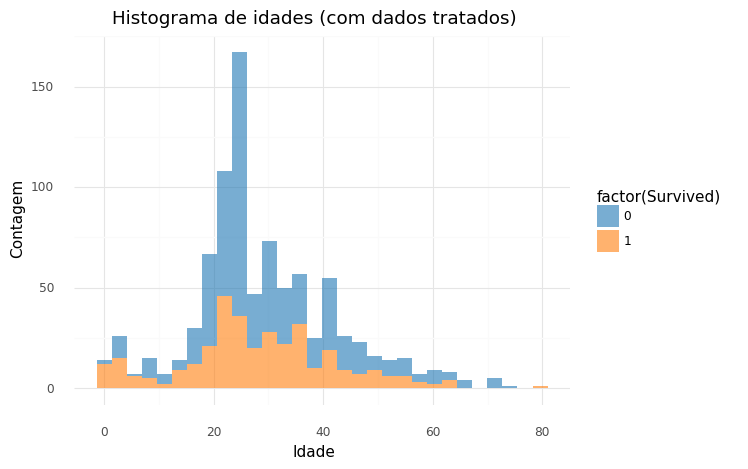

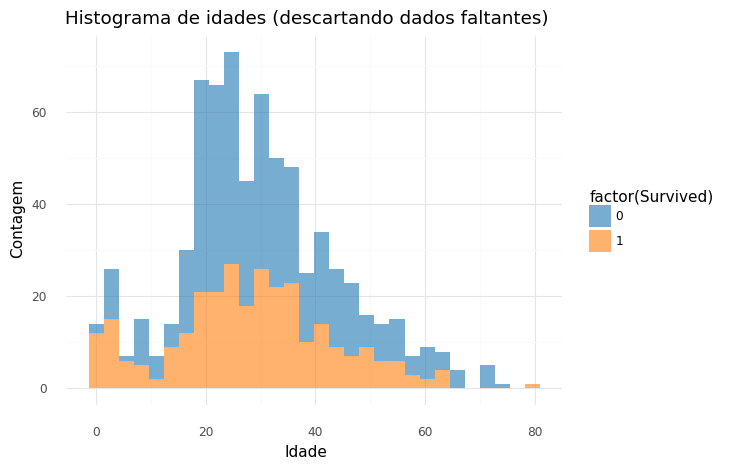

In [286]:
# Plota o histograma de idades com ggplot

plot1 = (
    ggplot(df_titanic, aes(x="Age", fill="factor(Survived)"))
    + geom_histogram(bins=30, alpha=0.6)
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Histograma de idades (com dados tratados)", x="Idade", y="Contagem")
)


# Plota o histograma de idades com ggplot

plot2 = (
    ggplot(df_titanic_sem_idade_na, aes(x="Age", fill="factor(Survived)"))
    + geom_histogram(bins=30, alpha=0.6)
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Histograma de idades (descartando dados faltantes)", x="Idade", y="Contagem")
)

print(plot1)

print(plot2)

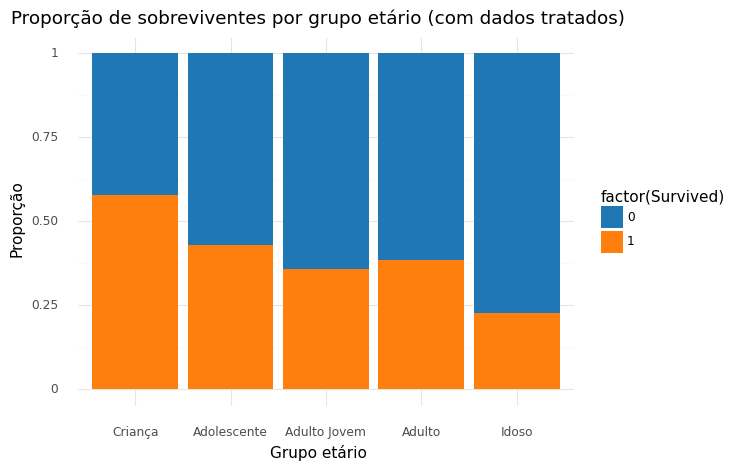

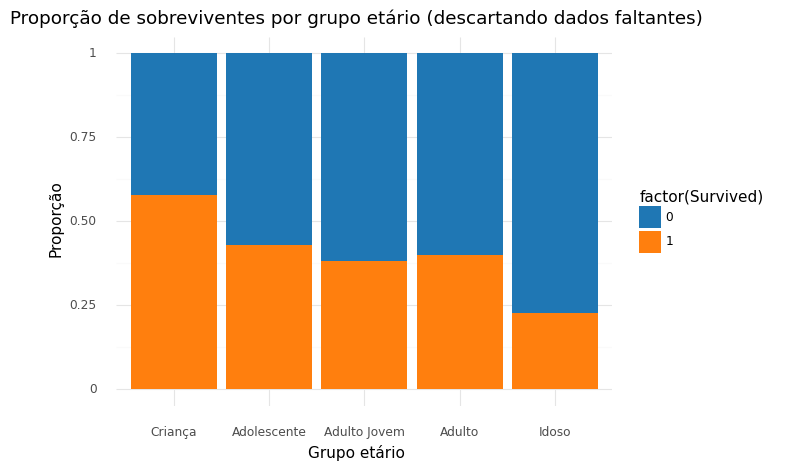

In [287]:
# Plota um gráfico de barras mostrando a quantidade de sobreviventes por AgeGroup em porcentagem

plot = (
    ggplot(df_titanic, aes(x="AgeGroup", fill="factor(Survived)"))
    + geom_bar(position="fill")
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Proporção de sobreviventes por grupo etário (com dados tratados)", x="Grupo etário", y="Proporção")
)
print(plot)

plot = (
    ggplot(df_titanic_sem_idade_na, aes(x="AgeGroup", fill="factor(Survived)"))
    + geom_bar(position="fill")
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Proporção de sobreviventes por grupo etário (descartando dados faltantes)", x="Grupo etário", y="Proporção")
)
print(plot)

- Os histogramas apresentaram formatos bem semelhantes.
- As distriuições de grupos etários ficaram praticamente identicas.
- O tratamento empregado nos dados faltantes de idade aparenta ter sido adequado.

### Avaliação das estatísticas do dataset

In [288]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plotagem de boxplots a partir da descrição

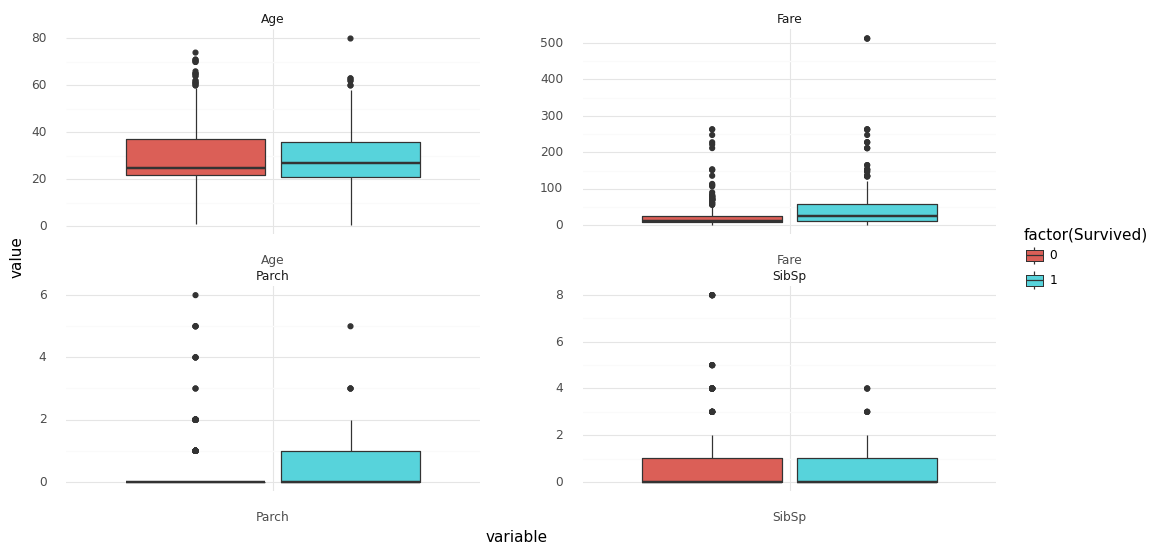

<ggplot: (806753118)>

In [289]:
df_titanic_melted = df_titanic.melt(value_vars=["Age", "SibSp", "Parch", "Fare"], id_vars="Survived")
(ggplot(df_titanic_melted, aes(x="variable", y="value", fill="factor(Survived)")) +
    geom_boxplot() +
    facet_wrap("~variable", scales="free") +
    theme_minimal() +
    theme(
        figure_size=(12, 6),
        subplots_adjust={'wspace': 0.25, 'hspace': 0.25}  # Ajuste os valores conforme necessário
    )
)


In [290]:
# Plota o número de outliers por campo numérico pelo critério do IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)].count()

outliers = df_titanic[["Age", "SibSp", "Parch", "Fare"]].apply(count_outliers)
print("Número de outliers por campo:")
print(outliers)

Número de outliers por campo:
Age       33
SibSp     46
Parch    213
Fare     116
dtype: int64


- *Parch* é a variável com maior númeo de outliers, seguida de Fare.

### Avaliação da distribuição de sobreviventes e não sobreviventes

Número de sobreviventes (1 é sobrevevivente):
0    549
1    342
Name: Survived, dtype: int64
Proporção de sobreviventes (1 é sobrevevivente):
0    0.616162
1    0.383838
Name: Survived, dtype: float64


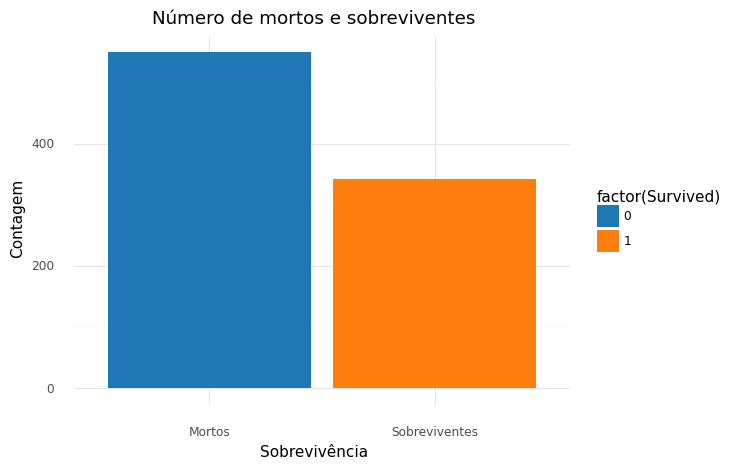

In [291]:
# Conta o número de sobreviventes e não sobreviventes
survived = df_titanic["Survived"].value_counts()
print("Número de sobreviventes (1 é sobrevevivente):")
print(survived)

# Calcula a proporção de sobreviventes e não sobreviventes
survived_prop = df_titanic["Survived"].value_counts(normalize=True)
print("Proporção de sobreviventes (1 é sobrevevivente):")
print(survived_prop)

# Plota o número de sobreviventes e não sobreviventes
plot = (
    ggplot(df_titanic, aes(x="factor(Survived)", fill="factor(Survived)"))
    + geom_bar()
    + theme_minimal()
   #+ scale_fill_manual(values=["red", "blue"])  # Define cores específicas
    + scale_x_discrete(
        labels=["Mortos", "Sobreviventes"]
    )  # Rótulos personalizados
    + labs(
        title="Número de mortos e sobreviventes",
        x="Sobrevivência",
        y="Contagem",
    )
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
)

print(plot)

- 62% de mortos e 38% de sobreviventes


### Visualização de variáveis categóricas

In [292]:
def plot_survival_barplot(df, category:str, title:str):
    """
        Plota um gráfico de barras empilhadas para a sobrevivência de uma categoria.
    """
    
    # Calcular os totais por sexo e sobrevivência
    total_df = df.groupby([category, 'Survived']).size().reset_index(name='Count')

    # Calcular o total de cada sexo
    sex_totals = total_df.groupby(category)['Count'].sum().reset_index(name='Total')
    total_df = total_df.merge(sex_totals, on=category)

    # Calcular a porcentagem
    total_df['Percentage'] = 100 * total_df['Count'] / total_df['Total']

    # Adicionar uma coluna para os rótulos formatados
    total_df['Label'] = total_df['Percentage'].apply(lambda x: '{:.1f}%'.format(x))

    # Calcula o número de valores únicos dentro da categoria
    unique_values = df[category].nunique()

    print(unique_values)

    # Adicionar uma linha para o total de cada sexo
    total_df_total = total_df.groupby(category).agg({'Total': 'sum', 'Percentage': 'sum'}).reset_index()
    total_df_total['Survived'] = 'Total'
    total_df_total['Count'] = total_df_total['Total'] / 2
    total_df_total['Percentage'] = 100  # Porcentagem total é 100%
    total_df_total['Label'] = '100.0%'  # Label para o total

    # Adicionar os totais ao DataFrame original
    combined_df = pd.concat([total_df, total_df_total], ignore_index=True)

    # Criar o gráfico com as porcentagens no topo das barras
    plot = (ggplot(combined_df, aes(x=category, y='Count', fill='factor(Survived)')) +
            geom_bar(stat='identity', position=position_dodge()) +
            labs(title=title, y='Count', x=category, fill='Survived') +
            scale_fill_manual(values=['#1f77b4', '#ff7f0e', '#2ca02c']) +
            geom_text(aes(label='Label'), position=position_dodge(width=0.9), va='bottom'))
    
    return plot    

#### Sobreviventes por Sexo

2


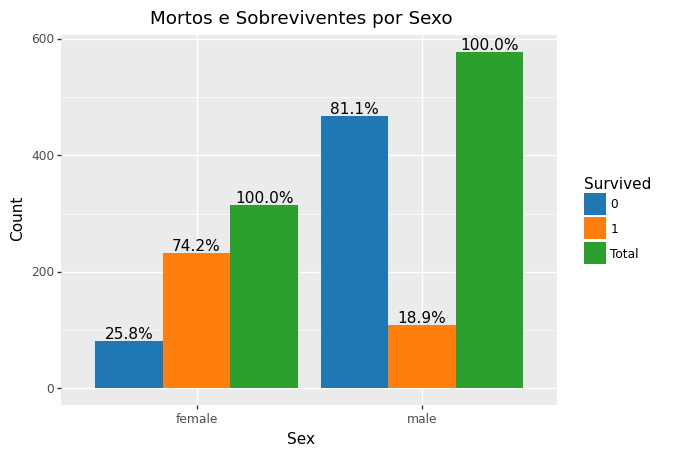

In [293]:
title = 'Mortos e Sobreviventes por Sexo'
category = 'Sex'

plot = plot_survival_barplot(df_titanic, category, title)
print(plot)


In [294]:
# Calculando o teste qui-quadrado entre Sex e Survived para avaliar o p-value

chi2_test_sex = chi2_contingency(pd.crosstab(df_titanic['Sex'], df_titanic['Survived']))

print(chi2_test_sex)

pvalue_sex = chi2_test_sex[1]



Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))


- O p-value encontrado vale aproximadamente 1.2e-58, indicando um resultado estatisticamente significativo.
- Gênero tem influência na sobrevivência

#### Sobreviventes por Classe

3


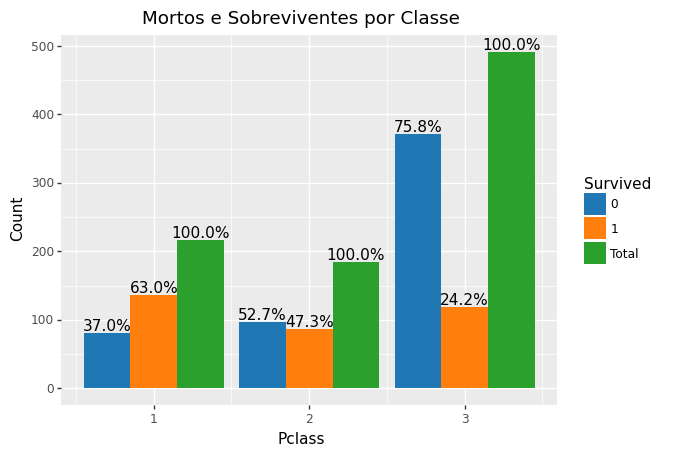

In [295]:
title = 'Mortos e Sobreviventes por Classe'
category = 'Pclass'

plot = plot_survival_barplot(df_titanic, category, title)
print(plot)


In [296]:
chi2_test_class = chi2_contingency(pd.crosstab(df_titanic['Pclass'], df_titanic['Survived']))

print(chi2_test_class)

pvalue_class = chi2_test_class[1]



Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))


- O p-value encontrado foi de 4.55e-23, comprovando a significância estatística da variável classe.
- Indivíduos de classes mais elevadas apresentam uma maior taxa de sobreviência os de classes inferiores.
- Apesar de significativa, a influência de classe parece ser inferior à influência de sexo.

#### Avaliação Simulânea de Classe e Sexo

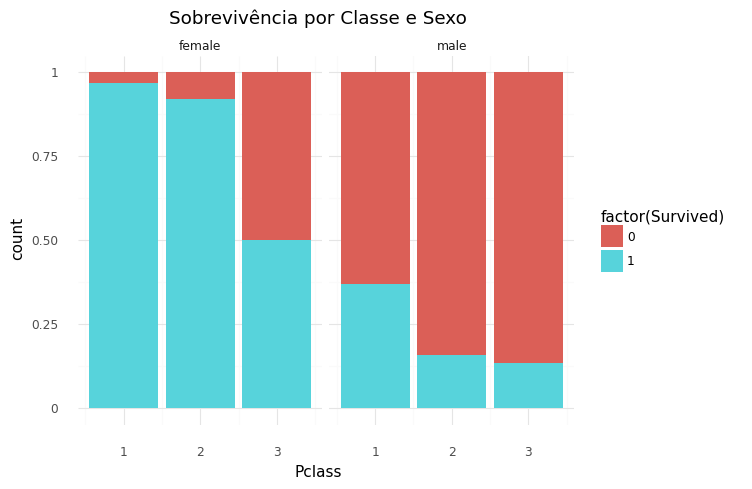

<ggplot: (813387590)>

In [317]:
(
    ggplot(df_titanic, aes(x="Pclass", fill="factor(Survived)"))
    + geom_bar(position="fill")
    + facet_wrap("~Sex")
    + theme_minimal()
    + labs(title="Sobrevivência por Classe e Sexo")
)


- Mulheres da primeira e segunda classe possuem uma taxa de sobrevivência que beira os 100%.
- Já para homens, é evidente que ser da primeira classe aumenta significativamente a taxa de sobrevivência, mas ainda assim ela é reduzida.
- Não parece haver muita diferença na taxa de sobrevivência de homens da segunda e terceira classe.

#### Sobreviventes por Grupo de Idade

5


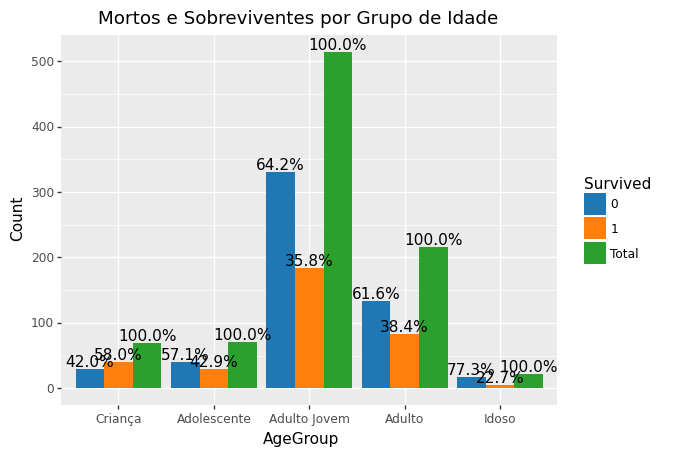

In [319]:
title = 'Mortos e Sobreviventes por Grupo de Idade '
category = 'AgeGroup'
plot = plot_survival_barplot(df_titanic, category, title)
print(plot)

In [320]:
chi2_test_age_group = chi2_contingency(pd.crosstab(df_titanic['AgeGroup'], df_titanic['Survived']))

print(chi2_test_age_group)

pvalue_age_group = chi2_test_age_group[1]


Chi2ContingencyResult(statistic=15.519269633327825, pvalue=0.003736968341386649, dof=4, expected_freq=array([[ 42.51515152,  26.48484848],
       [ 43.13131313,  26.86868687],
       [316.70707071, 197.29292929],
       [133.09090909,  82.90909091],
       [ 13.55555556,   8.44444444]]))


In [321]:
# Faz o ttest para idade e sobrevivência
ttest_age = ttest_ind(df_titanic[df_titanic["Survived"] == 1]["Age"], df_titanic[df_titanic["Survived"] == 0]["Age"], equal_var=False)
print(ttest_age)

TtestResult(statistic=-1.7432399804477365, pvalue=0.08174694936728184, df=675.1129687458936)


# PAREI AQUI - PRECISA FALAR QUE FIZ O TTEST E O CHI2 (CONTINUO E CATEGORICO)

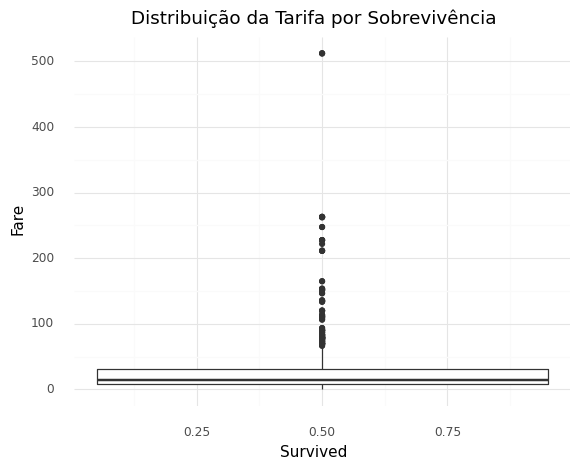

<ggplot: (811109373)>

In [303]:
ggplot(df_titanic, aes(x='Survived', y='Fare')) + geom_boxplot() + theme_minimal() + labs(title="Distribuição da Tarifa por Sobrevivência")


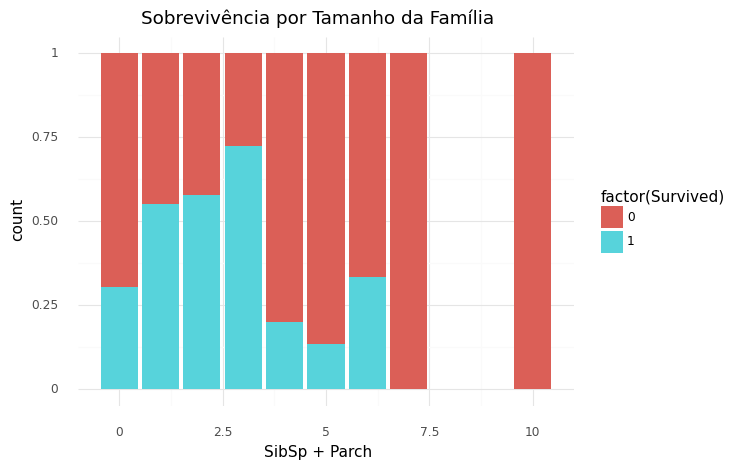

<ggplot: (813455996)>

In [318]:
ggplot(df_titanic, aes(x='SibSp + Parch', fill='factor(Survived)')) + geom_bar(position='fill') + theme_minimal() + labs(title="Sobrevivência por Tamanho da Família")


In [308]:
df_titanic_continuous = df_titanic[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]

# Converte todas as variávies para o tipo float
df_titanic_continuous = df_titanic_continuous.astype(float)

corr = df_titanic_continuous.corr()

In [309]:
corr

,Age,Fare,SibSp,Parch,Survived
Age,1.000000,0.122692,-0.249854,-0.175526,-0.059579
Fare,0.122692,1.000000,0.159651,0.216225,0.257307
SibSp,-0.249854,0.159651,1.000000,0.414838,-0.035322
Parch,-0.175526,0.216225,0.414838,1.000000,0.081629
Survived,-0.059579,0.257307,-0.035322,0.081629,1.000000


In [310]:
# Checa os tipos de cada coluna
df_titanic.dtypes



PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
AgeGroup       category
dtype: object

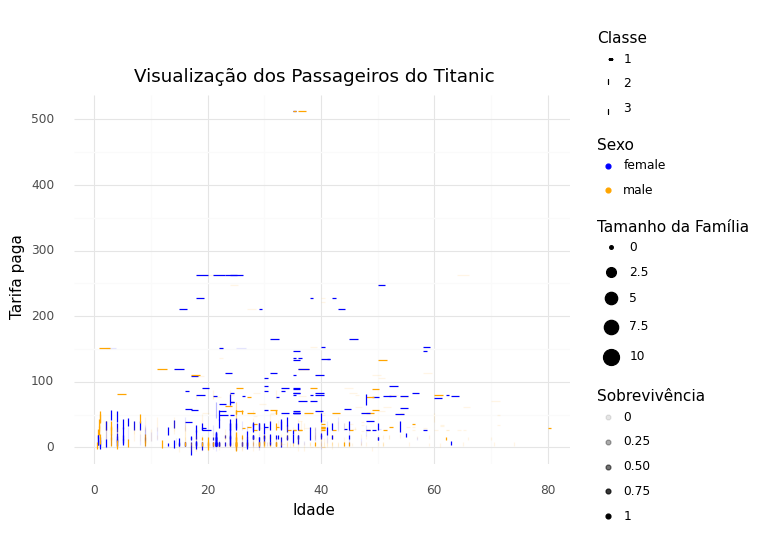

<ggplot: (811886544)>

In [311]:
titanic_data = df_titanic.copy(deep=True)
# Converta a coluna Pclass para categórico
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')


# Criar coluna para somar SibSp e Parch
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

# Gráfico de dispersão com várias propriedades mapeadas
plot = (ggplot(titanic_data, aes(x='Age', y='Fare', color='Sex', shape='Pclass', size='FamilySize', alpha='Survived')) +
        geom_point() +
        scale_shape_manual(values=[1, 2, 3]) +  # Diferentes formas para as classes
        scale_color_manual(values=['blue', 'orange']) +  # Cores para homens e mulheres
        theme_minimal() +
        labs(title="Visualização dos Passageiros do Titanic",
             x="Idade",
             y="Tarifa paga",
             color="Sexo",
             shape="Classe",
             size="Tamanho da Família",
             alpha="Sobrevivência"))
plot


/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/scales/scale.py:102: PlotnineWarning: scale_shape could not recognise parameter `values`


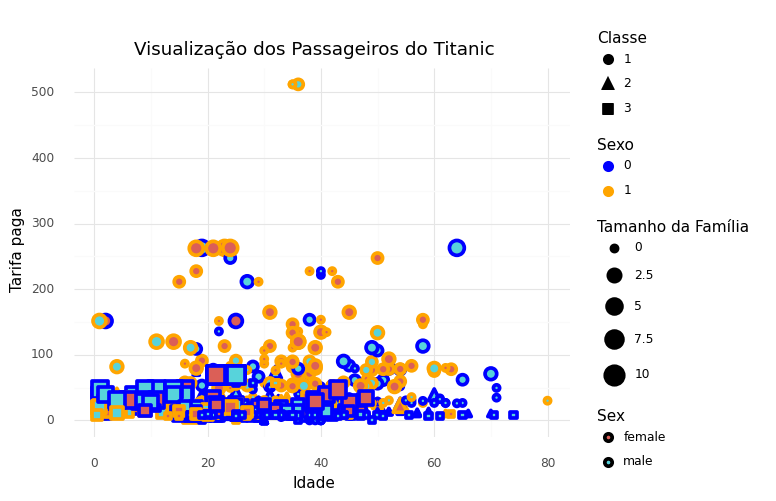

<ggplot: (810702855)>

In [312]:
titanic_data = df_titanic.copy(deep=True)
# Converta a coluna Pclass para categórico
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')


# Criar coluna para somar SibSp e Parch
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

# Gráfico de dispersão com várias propriedades mapeadas
plot = (ggplot(titanic_data, aes(x='Age', y='Fare', color='factor(Survived)', shape='Pclass', size='FamilySize')) +
        geom_point() +
        geom_point(aes(fill='Sex'), stroke=1.5) +  # stroke ajusta a largura do contorno
        scale_shape(values=[1, 4, 8]) +  # Diferentes formas para as classes
        scale_color_manual(values=['blue', 'orange', 'green']) +  # Cores para homens e mulheres
        theme_minimal() +
        labs(title="Visualização dos Passageiros do Titanic",
             x="Idade",
             y="Tarifa paga",
             color="Sexo",
             shape="Classe",
             size="Tamanho da Família"
             ))
plot


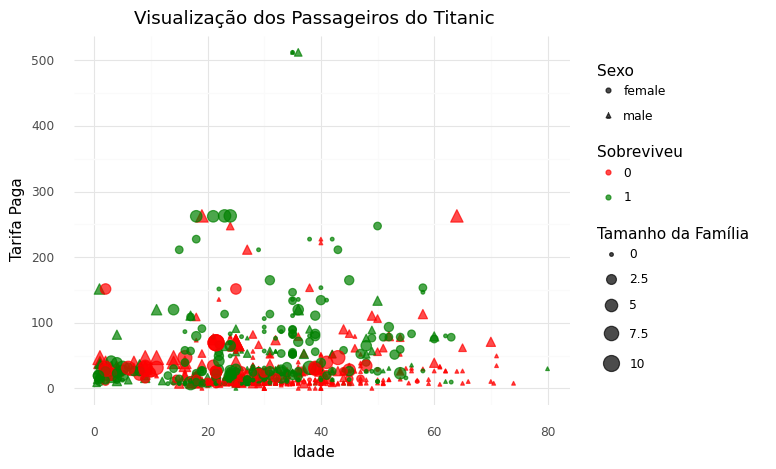

<ggplot: (810856533)>

In [313]:
# Gráfico simplificado: Survived como cor e Sex como forma
plot = (ggplot(titanic_data, aes(x='Age', y='Fare', color='factor(Survived)', shape='Sex')) +
        geom_point(aes(size='FamilySize'), alpha=0.7) +  # alpha ajustado para transparência
        scale_shape() +  # Círculo para homens, triângulo para mulheres
        scale_color_manual(values=['red', 'green']) +  # Cores para Survived
        theme_minimal() +
        labs(title="Visualização dos Passageiros do Titanic",
             x="Idade",
             y="Tarifa Paga",
             color="Sobreviveu",
             shape="Sexo",
             size="Tamanho da Família"))
plot


In [314]:
# faz o casting de Pclass para